<a href="https://colab.research.google.com/github/strongeryoung/class_SmartDataAnalysis/blob/main/CLASS_WEEK4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

3.  DataFrame 간의 연결 concat, merge, melt, pivot

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
# [출처] [파이썬] colab에서 plt 한글깨짐 해결|작성자 서울시립대 통계학과

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 나눔글꼴 경로 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font_prop = fm.FontProperties(fname=font_path)

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 12
# [출처] [파이썬] colab에서 plt 한글깨짐 해결|작성자 서울시립대 통계학과

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 18 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (10.1 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120895 files and direc

### What is pd.concat() ?

  - 두개 이상의 DataFrame을 "공통"의 Index 또는 columns 정보를 이용해서 결합
  - Pandas DataFrame 객체를 특정한 방향으로 이어붙이는 함수
  - 주요 파라미터들에 대한 설명

      1.   objs : a sequence or mapping of Series or DataFrame objects
      2.   axis : 결합되는 데이터의 방향 축 결정, default axis=0 (상하결합), axis=1 (좌우결합)
      3.   join : {‘inner’, ‘outer’}, default ‘outer’. inner의 경우 교집합, outer는 합집합
    

<img src = 'https://drive.google.com/uc?id=1_T3jmyFgg9g0jbLUCcfKNezE4RPaMOYt' height = 400 width = 700>
</center>

<이미지 출처 : https://medium.com/swlh/merging-dataframes-with-pandas-pd-merge-7764c7e2d46d>

In [3]:
import pandas as pd
import numpy as np

# 기본 예시
# 예시 데이터프레임 생성
# 디폴트는 상하결합

df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                    'B': ['B0', 'B1', 'B2', 'B3'],
                    'C': ['C0', 'C1', 'C2', 'C3'],
                    'D': ['D0', 'D1', 'D2', 'D3']})

df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                    'B': ['B4', 'B5', 'B6', 'B7'],
                    'C': ['C4', 'C5', 'C6', 'C7'],
                    'D': ['D4', 'D5', 'D6', 'D7']})

df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                    'B': ['B8', 'B9', 'B10', 'B11'],
                    'C': ['C8', 'C9', 'C10', 'C11'],
                    'D': ['D8', 'D9', 'D10', 'D11']})

# 데이터프레임을 행 방향으로 합치기
result = pd.concat([df1, df2, df3])

print(result)

     A    B    C    D
0   A0   B0   C0   D0
1   A1   B1   C1   D1
2   A2   B2   C2   D2
3   A3   B3   C3   D3
0   A4   B4   C4   D4
1   A5   B5   C5   D5
2   A6   B6   C6   D6
3   A7   B7   C7   D7
0   A8   B8   C8   D8
1   A9   B9   C9   D9
2  A10  B10  C10  D10
3  A11  B11  C11  D11


In [5]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [6]:
df2

,E,F,G,H
0,E4,F4,G4,H4
1,E5,F5,G5,H5
2,E6,F6,G6,H6
3,E7,F7,G7,H7


In [7]:
import pandas as pd
import numpy as np

# 기본 예시
# 예시 데이터프레임 생성
# 디폴트는 상하결합

df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                    'B': ['B0', 'B1', 'B2', 'B3'],
                    'C': ['C0', 'C1', 'C2', 'C3'],
                    'D': ['D0', 'D1', 'D2', 'D3']})

df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                    'B': ['B4', 'B5', 'B6', 'B7'],
                    'C': ['C4', 'C5', 'C6', 'C7'],
                    'D': ['D4', 'D5', 'D6', 'D7']})

df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                    'B': ['B8', 'B9', 'B10', 'B11'],
                    'C': ['C8', 'C9', 'C10', 'C11'],
                    'F': ['D8', 'D9', 'D10', 'D11']})  # F는 없기 때문에 NaN !

# 데이터프레임을 행 방향으로 합치기
result = pd.concat([df1, df2, df3])

print(result)

     A    B    C    D    F
0   A0   B0   C0   D0  NaN
1   A1   B1   C1   D1  NaN
2   A2   B2   C2   D2  NaN
3   A3   B3   C3   D3  NaN
0   A4   B4   C4   D4  NaN
1   A5   B5   C5   D5  NaN
2   A6   B6   C6   D6  NaN
3   A7   B7   C7   D7  NaN
0   A8   B8   C8  NaN   D8
1   A9   B9   C9  NaN   D9
2  A10  B10  C10  NaN  D10
3  A11  B11  C11  NaN  D11


In [4]:
# 예시 데이터프레임 생성
# axis=1을 주게 되면 데이터는 index를 중심으로 좌우 결합

df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                    'B': ['B0', 'B1', 'B2', 'B3'],
                    'C': ['C0', 'C1', 'C2', 'C3'],
                    'D': ['D0', 'D1', 'D2', 'D3']})

df2 = pd.DataFrame({'E': ['E4', 'E5', 'E6', 'E7'],
                    'F': ['F4', 'F5', 'F6', 'F7'],
                    'G': ['G4', 'G5', 'G6', 'G7'],
                    'H': ['H4', 'H5', 'H6', 'H7']})

# 데이터프레임을 열 방향으로 합치기
result = pd.concat([df1, df2], axis=1)

print(result)

    A   B   C   D   E   F   G   H
0  A0  B0  C0  D0  E4  F4  G4  H4
1  A1  B1  C1  D1  E5  F5  G5  H5
2  A2  B2  C2  D2  E6  F6  G6  H6
3  A3  B3  C3  D3  E7  F7  G7  H7


In [10]:
# parameter를 inner으로 사용했을 경우의 데이터 결합 결과
# axis = 0   # 공통인자만 가져와라

df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                    'B': ['B0', 'B1', 'B2', 'B3'],
                    'key': ['K0', 'K1', 'K2', 'K3']})

df2 = pd.DataFrame({'C': ['C0', 'C1', 'C2', 'C3'],
                    'D': ['D0', 'D1', 'D2', 'D3'],
                    'key': ['K0', 'K1', 'K2', 'K3']})

# key 열을 기준으로 inner join 수행
result = pd.concat([df1, df2], axis=0, join='inner')

print(result)   # 공통 칼럼이 key밖에 없음

  key
0  K0
1  K1
2  K2
3  K3
0  K0
1  K1
2  K2
3  K3


In [13]:
# parameter를 outer로 사용했을 경우의 데이터 결합 결과
# axis = 0

df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                    'B': ['B0', 'B1', 'B2', 'B3'],
                    'key': ['K0', 'K1', 'K2', 'K3']})

df2 = pd.DataFrame({'C': ['C0', 'C1', 'C2', 'C3'],
                    'D': ['D0', 'D1', 'D2', 'D3'],
                    'key': ['K0', 'K1', 'K2', 'K3']})

# key 열을 기준으로 inner join 수행
result = pd.concat([df1, df2], axis=0, join='outer')  # join='outer'

print(result)

     A    B key    C    D
0   A0   B0  K0  NaN  NaN
1   A1   B1  K1  NaN  NaN
2   A2   B2  K2  NaN  NaN
3   A3   B3  K3  NaN  NaN
0  NaN  NaN  K0   C0   D0
1  NaN  NaN  K1   C1   D1
2  NaN  NaN  K2   C2   D2
3  NaN  NaN  K3   C3   D3


In [22]:
result.fillna(0)   # na처리할때 0으로 채우고 싶다면

,A,B,key,C,D
0,A0,B0,K0,0,0
1,A1,B1,K1,0,0
2,A2,B2,K2,0,0
3,A3,B3,K3,0,0
0,0,0,K0,C0,D0
1,0,0,K1,C1,D1
2,0,0,K2,C2,D2
3,0,0,K3,C3,D3


In [23]:
result.fillna('None')   # na처리할때 None으로 채우고 싶다면

,A,B,key,C,D
0,A0,B0,K0,None,None
1,A1,B1,K1,None,None
2,A2,B2,K2,None,None
3,A3,B3,K3,None,None
0,None,None,K0,C0,D0
1,None,None,K1,C1,D1
2,None,None,K2,C2,D2
3,None,None,K3,C3,D3


In [24]:
result.fillna(method = 'bfill')   # 뒤의 숫자로 메꾸려면

,A,B,key,C,D
0,A0,B0,K0,C0,D0
1,A1,B1,K1,C0,D0
2,A2,B2,K2,C0,D0
3,A3,B3,K3,C0,D0
0,NaN,NaN,K0,C0,D0
1,NaN,NaN,K1,C1,D1
2,NaN,NaN,K2,C2,D2
3,NaN,NaN,K3,C3,D3


In [26]:
result.fillna(method = 'ffill')   # 앞의 숫자로 메꾸려면

,A,B,key,C,D
0,A0,B0,K0,NaN,NaN
1,A1,B1,K1,NaN,NaN
2,A2,B2,K2,NaN,NaN
3,A3,B3,K3,NaN,NaN
0,A3,B3,K0,C0,D0
1,A3,B3,K1,C1,D1
2,A3,B3,K2,C2,D2
3,A3,B3,K3,C3,D3


In [29]:

## 이 경우 result 에 ID 칼럼을 삽입하여 key 값을 구분할 필요 있음

df1['id'] = 'hotel'
df2['id'] = 'tour'

result = pd.concat([df1, df2], axis=0, join='inner') # 상하결합으로, 공통으로 결합

print(result[['id', 'key']])

      id key
0  hotel  K0
1  hotel  K1
2  hotel  K2
3  hotel  K3
0   tour  K0
1   tour  K1
2   tour  K2
3   tour  K3


In [30]:
# axis=1로 변경했을 경우

result = pd.concat([df1, df2], axis=1, join='outer')
result

,A,B,key,id,C,D,key,id
0,A0,B0,K0,hotel,C0,D0,K0,tour
1,A1,B1,K1,hotel,C1,D1,K1,tour
2,A2,B2,K2,hotel,C2,D2,K2,tour
3,A3,B3,K3,hotel,C3,D3,K3,tour


### What is pd.merge() ?

- 공통 column의 명칭을 이용하여 두 DataFrame 을 결합시킴  # 두개의 칼럼만 결합시킬 수 있음
- df = pd.merge(left_DataFrame, right_DataFrame, on= '', how = ' ') \
- concat은 join으로 묻지만, merge는 how로 물어봄
- on = '' 에 입력되는 key value 명칭이 두개 DataFrame 모두 동일 해야함
- 결합방식 : how = 'inner', 'outer', 'left', 'right'


<img src = 'https://drive.google.com/uc?id=1Cq-drez35wApSS1ebu3gUaPep2J47rOX' height = 400 width = 700>
</center>

In [31]:

# 첫 번째 데이터프레임
df1 = pd.DataFrame({
    'key': ['K0', 'K1', 'K2', 'K3'],
    'A': ['A0', 'A1', 'A2', 'A3'],
    'B': ['B0', 'B1', 'B2', 'B3']
})

# 두 번째 데이터프레임
df2 = pd.DataFrame({
    'key': ['K0', 'K1', 'K2', 'K3'],
    'C': ['C0', 'C1', 'C2', 'C3'],
    'D': ['D0', 'D1', 'D2', 'D3']
})

In [32]:
df1

,key,A,B
0,K0,A0,B0
1,K1,A1,B1
2,K2,A2,B2
3,K3,A3,B3


In [33]:
df2

,key,C,D
0,K0,C0,D0
1,K1,C1,D1
2,K2,C2,D2
3,K3,C3,D3


In [36]:
result = pd.merge(df1, df2, on='key')  # 좌우결합
result

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


In [45]:
# 첫 번째 데이터프레임
df1 = pd.DataFrame({
    'key': ['K0', 'K1', 'K2', 'K3'],
    'A': ['A0', 'A1', 'A2', 'A3'],
    'B': ['B0', 'B1', 'B2', 'B3']
})

# 두 번째 데이터프레임
df2 = pd.DataFrame({
    'key': ['K0', 'K1', 'K2', 'K4'], # 마지막 데이터가 'K4'로 바뀌었을때
    'C': ['C0', 'C1', 'C2', 'C3'],
    'D': ['D0', 'D1', 'D2', 'D3']
})

In [38]:
df1

,key,A,B
0,K0,A0,B0
1,K1,A1,B1
2,K2,A2,B2
3,K3,A3,B3


In [39]:
df2

,key,C,D
0,K0,C0,D0
1,K1,C1,D1
2,K2,C2,D2
3,K4,C3,D3


In [41]:
result = pd.merge(df1, df2, on='key')
result

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,C2,D2


In [42]:
result = pd.merge(df1, df2, on='key', how='right')
result

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,C2,D2
3,K4,NaN,NaN,C3,D3


In [44]:
result = pd.merge(df1, df2, on='key', how='left')
result

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,C2,D2
3,K3,A3,B3,NaN,NaN


### 실전 데이터 전처리 example (1)

In [51]:
## 6개 기업들의 주가가 들어간 csv data를 import 한다
path = '/week4_stock_price1.csv'
raw_df = pd.read_csv(path)
raw_df

## 데이터 구성 형태가 가공하기에 다소 불편한 형태이다

,date,A008770,A034230,A114090,A039130,A005930,A000660
0,2019-12-30,"90,800","19,750","19,450","49,916","55,800","94,100"
1,2020-01-02,"94,000","20,150","19,450","51,577","55,200","94,700"
2,2020-01-03,"95,300","19,900","19,600","51,577","55,500","94,500"
3,2020-01-06,"94,900","19,000","19,050","49,428","55,500","94,300"
4,2020-01-07,"99,400","20,000","20,000","50,210","55,800","94,000"
...,...,...,...,...,...,...,...
910,2023-09-04,"88,000","17,010","16,520","48,600","71,200","119,200"
911,2023-09-05,"88,400","16,850","16,600","48,200","70,700","119,400"
912,2023-09-06,"88,900","17,250","17,180","47,800","70,000","118,200"
913,2023-09-07,"86,900","17,140","17,060","47,100","70,400","118,500"


In [52]:
## 데이터 탐색 (1)
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 915 entries, 0 to 914
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   date     915 non-null    object
 1   A008770  915 non-null    object
 2   A034230  915 non-null    object
 3   A114090  915 non-null    object
 4   A039130  915 non-null    object
 5   A005930  915 non-null    object
 6   A000660  915 non-null    object
dtypes: object(7)
memory usage: 50.2+ KB


In [53]:
## 데이터 탐색 (2) : 결측치 확인
# 결측치가 없을 경우 .isna().sum() 결과가 0
# 결측치가 존재할 경우 1이상 으로 표시 됨

raw_df.isna().sum()

date       0
A008770    0
A034230    0
A114090    0
A039130    0
A005930    0
A000660    0
dtype: int64

### To be DataFrame

- 기업코드 columns를 중심으로 추가적인 data columns를 추가하는 형태가 향후
데이터 처리에 유리함
- 추가적으로 date 와 주가 data가 모두 'object' 에서 'int'형태로 전환 필요

|    date    |   Code  | company_name | price | log_price | log_ret | MA5 | MA20 | MA60 | vol_5 | vol_20 | vol_60 |
|:----------:|:-------:|:------------:|:-----:|:---------:|:-------:|:---:|:----:|:-----:|:-----:|:------:|:-------:|
| 2019-12-30 | A008770 |   호텔신라   | 90800 | 11.416    | 　      | 　  | 　   | 　    | 　    | 　     | 　      |
| 2019-12-31 | A008770 |   호텔신라   | 　    | 　        | 　      | 　  | 　   | 　    | 　    | 　     | 　      |
| 2020-01-01 | A008770 |   호텔신라   | 　    | 　        | 　      | 　  | 　   | 　    | 　    | 　     | 　      |
| 2020-01-02 | A008770 |   호텔신라   | 　    | 　        | 　      | 　  | 　   | 　    | 　    | 　     | 　      |

In [54]:
## 데이터 type 변형

raw_df['date'] = pd.to_datetime(raw_df['date'], format='%Y-%m-%d')

In [56]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 915 entries, 0 to 914
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     915 non-null    datetime64[ns]
 1   A008770  915 non-null    object        
 2   A034230  915 non-null    object        
 3   A114090  915 non-null    object        
 4   A039130  915 non-null    object        
 5   A005930  915 non-null    object        
 6   A000660  915 non-null    object        
dtypes: datetime64[ns](1), object(6)
memory usage: 50.2+ KB


In [62]:
# col_list = raw_df.columns.tolist()
# col_list

In [71]:
col_list = raw_df.columns.tolist()

cd_list = [col for col in col_list if 'A' in col]
cd_list

['A008770', 'A034230', 'A114090', 'A039130', 'A005930', 'A000660']

In [70]:
col_list = raw_df.columns.tolist()

cd_list = [col for col in col_list if 'A' not in col]
cd_list

['date']

In [72]:
col_list = raw_df.columns.tolist()

cd_list = [col for col in col_list if 'A' in col]
cd_list

['A008770', 'A034230', 'A114090', 'A039130', 'A005930', 'A000660']

In [73]:
cd_list

['A008770', 'A034230', 'A114090', 'A039130', 'A005930', 'A000660']

In [61]:
raw_df.filter(like='A')

,A008770,A034230,A114090,A039130,A005930,A000660
0,"90,800","19,750","19,450","49,916","55,800","94,100"
1,"94,000","20,150","19,450","51,577","55,200","94,700"
2,"95,300","19,900","19,600","51,577","55,500","94,500"
3,"94,900","19,000","19,050","49,428","55,500","94,300"
4,"99,400","20,000","20,000","50,210","55,800","94,000"
...,...,...,...,...,...,...
910,"88,000","17,010","16,520","48,600","71,200","119,200"
911,"88,400","16,850","16,600","48,200","70,700","119,400"
912,"88,900","17,250","17,180","47,800","70,000","118,200"
913,"86,900","17,140","17,060","47,100","70,400","118,500"


In [76]:
coname_list = ['호텔신라', '파라다이스', 'GKL', '하나투어', '삼성전자', 'SK하이닉스']

for cd, name in zip(cd_list, coname_list):
  print(cd, name)

A008770 호텔신라
A034230 파라다이스
A114090 GKL
A039130 하나투어
A005930 삼성전자
A000660 SK하이닉스


In [82]:
date = '2019-12-30'
cd = 'A008770'

temp_df = raw_df[['date', cd]].copy()
temp_df

,date,A008770
0,2019-12-30,"90,800"
1,2020-01-02,"94,000"
2,2020-01-03,"95,300"
3,2020-01-06,"94,900"
4,2020-01-07,"99,400"
...,...,...
910,2023-09-04,"88,000"
911,2023-09-05,"88,400"
912,2023-09-06,"88,900"
913,2023-09-07,"86,900"


In [83]:
date = '2019-12-30'
cd = 'A008770'

temp_df = raw_df[['date', cd]].copy()
temp_df['code'] = cd
temp_df

,date,A008770,code
0,2019-12-30,"90,800",A008770
1,2020-01-02,"94,000",A008770
2,2020-01-03,"95,300",A008770
3,2020-01-06,"94,900",A008770
4,2020-01-07,"99,400",A008770
...,...,...,...
910,2023-09-04,"88,000",A008770
911,2023-09-05,"88,400",A008770
912,2023-09-06,"88,900",A008770
913,2023-09-07,"86,900",A008770


In [88]:
date = '2019-12-30'
cd = 'A008770'

temp_df = raw_df[['date', cd]].copy()
temp_df['code'] = cd
temp_df.rename(columns={'A008770':'price'})

,date,price,code
0,2019-12-30,"90,800",A008770
1,2020-01-02,"94,000",A008770
2,2020-01-03,"95,300",A008770
3,2020-01-06,"94,900",A008770
4,2020-01-07,"99,400",A008770
...,...,...,...
910,2023-09-04,"88,000",A008770
911,2023-09-05,"88,400",A008770
912,2023-09-06,"88,900",A008770
913,2023-09-07,"86,900",A008770


In [93]:
## 숫자가 object로 확인되는 이유는 숫자에 자리수 ,가 존재하기 때문

col_list = raw_df.columns.tolist()
cd_list = [col for col in col_list if 'A' in col] # 한줄for문
coname_list = ['호텔신라', '파라다이스', 'GKL', '하나투어', '삼성전자', 'SK하이닉스']

df_list = []

for cd, name in zip(cd_list, coname_list):

    temp_df = raw_df[['date', cd]].copy()
    temp_df[cd] = temp_df[cd].apply(lambda x : x.replace(',', '')).copy()  # 쉼표(,)을 없애기 위해 apply(lamda)
    temp_df[cd] =  temp_df[cd].astype('int64')
    temp_df['code'] = cd
    temp_df['company_name'] = name
    #print(temp_df)
    temp_df = temp_df.rename(columns={cd : 'price'})  # rename 이름 바꾸기
    temp_df['log_price'] = np.log(temp_df['price']).copy() # 가격에 log_price 매기기
    temp_df['log_ret'] = temp_df['log_price'].diff()
    temp_df['ret'] = temp_df['price'].pct_change()
    temp_df['ma5'] = temp_df['price'].rolling(window=5).mean()
    temp_df['ma20'] = temp_df['price'].rolling(window=20).mean()
    temp_df['ma60'] = temp_df['price'].rolling(window=60).mean()
    temp_df['vol5'] = temp_df['log_ret'].rolling(window=5).std()
    temp_df['vol20'] = temp_df['log_ret'].rolling(window=20).std()
    temp_df['vol60'] = temp_df['log_ret'].rolling(window=60).std()

    df_list.append(temp_df)


stock_price_df = pd.concat(df_list)  #데이터프레임을 깔끔히 보기위함 - concat 사용
stock_price_df = stock_price_df[['date', 'code', 'company_name', 'price', 'log_price', 'log_ret', 'ma5', 'ma20', 'ma60', 'vol5', 'vol20', 'vol60']].copy()

In [90]:
df_list

[          date  price     code company_name  log_price   log_ret       ret  \
 0   2019-12-30  90800  A008770         호텔신라  11.416415       NaN       NaN   
 1   2020-01-02  94000  A008770         호텔신라  11.451050  0.034635  0.035242   
 2   2020-01-03  95300  A008770         호텔신라  11.464785  0.013735  0.013830   
 3   2020-01-06  94900  A008770         호텔신라  11.460579 -0.004206 -0.004197   
 4   2020-01-07  99400  A008770         호텔신라  11.506907  0.046328  0.047418   
 ..         ...    ...      ...          ...        ...       ...       ...   
 910 2023-09-04  88000  A008770         호텔신라  11.385092 -0.002270 -0.002268   
 911 2023-09-05  88400  A008770         호텔신라  11.389627  0.004535  0.004545   
 912 2023-09-06  88900  A008770         호텔신라  11.395267  0.005640  0.005656   
 913 2023-09-07  86900  A008770         호텔신라  11.372513 -0.022754 -0.022497   
 914 2023-09-08  88100  A008770         호텔신라  11.386228  0.013715  0.013809   
 
          ma5     ma20          ma60      vol5    

In [91]:
df_list[0]

,date,price,code,company_name,log_price,log_ret,ret,ma5,ma20,ma60,vol5,vol20,vol60
0,2019-12-30,90800,A008770,호텔신라,11.416415,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-02,94000,A008770,호텔신라,11.451050,0.034635,0.035242,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-03,95300,A008770,호텔신라,11.464785,0.013735,0.013830,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-06,94900,A008770,호텔신라,11.460579,-0.004206,-0.004197,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-07,99400,A008770,호텔신라,11.506907,0.046328,0.047418,94880.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
910,2023-09-04,88000,A008770,호텔신라,11.385092,-0.002270,-0.002268,87920.0,86020.0,77598.333333,0.012572,0.038251,0.026446
911,2023-09-05,88400,A008770,호텔신라,11.389627,0.004535,0.004545,88080.0,86685.0,77836.666667,0.003734,0.038229,0.025937
912,2023-09-06,88900,A008770,호텔신라,11.395267,0.005640,0.005656,88340.0,87405.0,78088.333333,0.003896,0.038046,0.025923
913,2023-09-07,86900,A008770,호텔신라,11.372513,-0.022754,-0.022497,88080.0,88050.0,78313.333333,0.011524,0.038556,0.026115


In [94]:
stock_price_df

,date,code,company_name,price,log_price,log_ret,ma5,ma20,ma60,vol5,vol20,vol60
0,2019-12-30,A008770,호텔신라,90800,11.416415,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-02,A008770,호텔신라,94000,11.451050,0.034635,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-03,A008770,호텔신라,95300,11.464785,0.013735,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-06,A008770,호텔신라,94900,11.460579,-0.004206,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-07,A008770,호텔신라,99400,11.506907,0.046328,94880.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
910,2023-09-04,A000660,SK하이닉스,119200,11.688558,-0.006689,119800.0,117835.0,117125.000000,0.016434,0.018800,0.021850
911,2023-09-05,A000660,SK하이닉스,119400,11.690234,0.001676,119960.0,117710.0,117201.666667,0.013242,0.018465,0.021837
912,2023-09-06,A000660,SK하이닉스,118200,11.680133,-0.010101,119720.0,117690.0,117180.000000,0.013665,0.017543,0.021253
913,2023-09-07,A000660,SK하이닉스,118500,11.682668,0.002535,119060.0,117690.0,117175.000000,0.007530,0.017553,0.021243


In [103]:
# stock_price_df 에서 '호텔신라' 만 추출

stock_price_df[stock_price_df{'company_name'} == '호텔신라']

SyntaxError: ignored

In [101]:
coname_list = ['호텔신라']
co_list = ['A008770']    #리스트 하나씩만 만들어서 명령어 사용하여 어떻게 변화하는지 확인해보기

이 코드는 주식 데이터를 전처리하여 필요한 특성들을 계산하고, 이를 하나의 데이터프레임으로 합치는 작업을 수행하는 파이썬 코드입니다. 코드를 한 줄씩 해석해보겠습니다:

1. 첫 줄에서는 주석으로 설명이 주어져 있습니다. `## 숫자가 object로 확인되는 이유는 숫자에 자리수 ,가 존재하기 때문` 이라고 되어 있습니다. 이 주석은 코드가 실행되는 환경에서 숫자 데이터가 문자열(object)로 처리되는 이유를 설명하고 있습니다. 이는 데이터에 숫자에 포함된 쉼표(,) 때문입니다.

2. `col_list`는 `raw_df`의 열 이름들을 리스트로 저장합니다.

3. `cd_list`는 열 이름 중에서 'A'를 포함하는 열 이름들을 모아놓은 리스트입니다.

4. `coname_list`는 여러 회사의 이름을 담은 리스트입니다.

5. `df_list`는 추후에 각 회사에 대한 데이터프레임을 저장할 리스트입니다.

6. `for` 루프에서는 `cd_list`와 `coname_list`를 동시에 순회하며 작업을 수행합니다. 각각의 `cd`와 `name`은 현재 순회 중인 열 이름과 회사 이름을 나타냅니다.

7. `temp_df`는 `raw_df`에서 'date'와 해당 회사의 주식 가격 열을 선택하여 복사한 데이터프레임입니다.

8. `temp_df[cd]` 열에 있는 쉼표(,)를 제거하기 위해 `apply()` 함수와 람다(lambda) 함수를 사용합니다. (중요)

9. `temp_df[cd]` 열의 데이터 타입을 정수형(`int64`)으로 변환합니다.

10. 'code' 열에는 `cd` 값을, 'company_name' 열에는 `name` 값을 할당합니다.

11. 'cd' 열 이름을 'price'로 변경합니다.

12. 'log_price' 열에는 'price' 열의 로그 값을 저장합니다.

13. 'log_ret' 열에는 'log_price' 열의 차분 값을 저장합니다.

14. 'ret' 열에는 'price' 열의 변화율을 계산하여 저장합니다.

15. 'ma5', 'ma20', 'ma60' 열에는 이동평균을 계산하여 저장합니다. 각각 5일, 20일, 60일의 이동평균입니다. (window parameter 조정가능)

16. 'vol5', 'vol20', 'vol60' 열에는 이동표준편차를 계산하여 저장합니다. 각각 5일, 20일, 60일의 이동표준편차입니다.

17. 각 회사에 대한 전처리가 완료된 `temp_df`는 `df_list`에 추가됩니다.

18. `pd.concat()` 함수를 사용하여 `df_list`에 있는 모든 데이터프레임들을 하나로 합칩니다.

19. 필요한 열만 선택하여 `stock_price_df`에 할당합니다.

이렇게 함으로써, 각 회사에 대한 주식 데이터를 전처리하고 이를 하나의 데이터프레임으로 합치게 됩니다. 이후 `stock_price_df`를 사용하여 추가적인 분석이나 시각화 작업을 수행할 수 있습니다.

In [104]:
## 각 기업들 주가 수익률간의 상관관계를 구해보자

In [105]:
stock_price_df

,date,code,company_name,price,log_price,log_ret,ma5,ma20,ma60,vol5,vol20,vol60
0,2019-12-30,A008770,호텔신라,90800,11.416415,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-02,A008770,호텔신라,94000,11.451050,0.034635,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-03,A008770,호텔신라,95300,11.464785,0.013735,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-06,A008770,호텔신라,94900,11.460579,-0.004206,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-07,A008770,호텔신라,99400,11.506907,0.046328,94880.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
910,2023-09-04,A000660,SK하이닉스,119200,11.688558,-0.006689,119800.0,117835.0,117125.000000,0.016434,0.018800,0.021850
911,2023-09-05,A000660,SK하이닉스,119400,11.690234,0.001676,119960.0,117710.0,117201.666667,0.013242,0.018465,0.021837
912,2023-09-06,A000660,SK하이닉스,118200,11.680133,-0.010101,119720.0,117690.0,117180.000000,0.013665,0.017543,0.021253
913,2023-09-07,A000660,SK하이닉스,118500,11.682668,0.002535,119060.0,117690.0,117175.000000,0.007530,0.017553,0.021243


In [107]:
## 호텔신라의 월평균 주가 산출

df = stock_price_df[stock_price_df['company_name'] == '호텔신라']

In [118]:
df_test = df.copy()

df_test['year'] = df_test['date'].dt.year
df_test['month'] = df_test['date'].dt.month
df_test.groupby(['year', 'month'])[['price']].mean()

price
year month              
2019 12     90800.000000
2020 1      98495.000000
     2      90775.000000
     3      74772.727273
     4      75155.000000
     5      81157.894737
     6      75290.909091
     7      70443.478261
     8      72020.000000
     9      74842.857143
     10     75884.210526
     11     79338.095238
     12     81933.333333
2021 1      84005.000000
     2      82322.222222
     3      85690.909091
     4      85068.181818
     5      93984.210526
     6      98095.454545
     7      94209.090909
     8      90000.000000
     9      88589.473684
     10     90010.526316
     11     79359.090909
     12     76672.727273
2022 1      74935.000000
     2      79100.000000
     3      80366.666667
     4      82700.000000
     5      76128.571429
     6      73200.000000
     7      69300.000000
     8      72345.454545
     9      73150.000000
     10     72731.578947
     11     69404.545455
     12     79561.904762
2023 1      82610.000000
     2      80595.000000
     3      77031.818182
     4      82265.000000
     5      81915.000000
     6      74514.285714
     7      73266.666667
     8      83731.818182
     9      88083.333333

In [109]:
df_monthly = df.groupby([df.date.dt.year, df.date.dt.month])[['price']].mean()  # 그룹바이
df_monthly
#df_monthly['price'].plot()

price
date date              
2019 12    90800.000000
2020 1     98495.000000
     2     90775.000000
     3     74772.727273
     4     75155.000000
     5     81157.894737
     6     75290.909091
     7     70443.478261
     8     72020.000000
     9     74842.857143
     10    75884.210526
     11    79338.095238
     12    81933.333333
2021 1     84005.000000
     2     82322.222222
     3     85690.909091
     4     85068.181818
     5     93984.210526
     6     98095.454545
     7     94209.090909
     8     90000.000000
     9     88589.473684
     10    90010.526316
     11    79359.090909
     12    76672.727273
2022 1     74935.000000
     2     79100.000000
     3     80366.666667
     4     82700.000000
     5     76128.571429
     6     73200.000000
     7     69300.000000
     8     72345.454545
     9     73150.000000
     10    72731.578947
     11    69404.545455
     12    79561.904762
2023 1     82610.000000
     2     80595.000000
     3     77031.818182
     4     82265.000000
     5     81915.000000
     6     74514.285714
     7     73266.666667
     8     83731.818182
     9     88083.333333

### What is pivot() ?
- stock_price_df 에서 pivot 을 이용하여 원하는 데이터를 추출해 낸다

In [119]:
## pivot 활용 예시

import pandas as pd

data = {
    '이름': ['Alice', 'Bob', 'Charlie', 'Alice', 'Bob', 'Charlie'],
    '과목': ['수학', '수학', '수학', '과학', '과학', '과학'],
    '성적': [85, 90, 78, 92, 88, 85]
}

df = pd.DataFrame(data)
print(df)

        이름  과목  성적
0    Alice  수학  85
1      Bob  수학  90
2  Charlie  수학  78
3    Alice  과학  92
4      Bob  과학  88
5  Charlie  과학  85


In [120]:
pivot_df = df.pivot(index='이름', columns='과목', values='성적')
pivot_df

과목,과학,수학
이름,,
Alice,92,85
Bob,88,90
Charlie,85,78


- 6개 기업들의 주가에 대한 간략 통계량 측정

In [126]:
price_df = stock_price_df.pivot(index = 'date', columns='company_name', values= 'price')
price_df

company_name,GKL,SK하이닉스,삼성전자,파라다이스,하나투어,호텔신라
date,,,,,,
2019-12-30,19450,94100,55800,19750,49916,90800
2020-01-02,19450,94700,55200,20150,51577,94000
2020-01-03,19600,94500,55500,19900,51577,95300
2020-01-06,19050,94300,55500,19000,49428,94900
2020-01-07,20000,94000,55800,20000,50210,99400
...,...,...,...,...,...,...
2023-09-04,16520,119200,71200,17010,48600,88000
2023-09-05,16600,119400,70700,16850,48200,88400
2023-09-06,17180,118200,70000,17250,47800,88900


In [127]:
price_df = stock_price_df.pivot(index = 'date', columns='company_name', values= 'price')
price_df.describe().round(2)

company_name,GKL,SK하이닉스,삼성전자,파라다이스,하나투어,호텔신라
count,915.00,915.00,915.00,915.00,915.00,915.00
mean,15813.22,103343.61,66603.50,15862.85,58691.21,80382.62
std,2288.92,18086.18,10208.54,1811.63,14636.21,8006.09
min,10900.00,69000.00,42500.00,9790.00,27156.00,61800.00
25%,14200.00,86800.00,59000.00,14535.00,48871.00,74000.00
50%,15700.00,100000.00,65700.00,16000.00,57500.00,80100.00
75%,17000.00,118550.00,74250.00,17100.00,71254.50,84700.00
max,22250.00,148500.00,91000.00,21800.00,90455.00,108500.00


In [128]:
price_df

company_name,GKL,SK하이닉스,삼성전자,파라다이스,하나투어,호텔신라
date,,,,,,
2019-12-30,19450,94100,55800,19750,49916,90800
2020-01-02,19450,94700,55200,20150,51577,94000
2020-01-03,19600,94500,55500,19900,51577,95300
2020-01-06,19050,94300,55500,19000,49428,94900
2020-01-07,20000,94000,55800,20000,50210,99400
...,...,...,...,...,...,...
2023-09-04,16520,119200,71200,17010,48600,88000
2023-09-05,16600,119400,70700,16850,48200,88400
2023-09-06,17180,118200,70000,17250,47800,88900


In [122]:
temp_df = stock_price_df.pivot(index = 'date', columns='company_name', values= 'log_ret')
temp_df

company_name,GKL,SK하이닉스,삼성전자,파라다이스,하나투어,호텔신라
date,,,,,,
2019-12-30,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-02,0.000000,0.006356,-0.010811,0.020051,0.032734,0.034635
2020-01-03,0.007682,-0.002114,0.005420,-0.012485,0.000000,0.013735
2020-01-06,-0.028462,-0.002119,0.000000,-0.046281,-0.042559,-0.004206
2020-01-07,0.048665,-0.003186,0.005391,0.051293,0.015697,0.046328
...,...,...,...,...,...,...
2023-09-04,0.015249,-0.006689,0.002813,-0.006446,0.005157,-0.002270
2023-09-05,0.004831,0.001676,-0.007047,-0.009451,-0.008265,0.004535
2023-09-06,0.034343,-0.010101,-0.009950,0.023461,-0.008333,0.005640


In [135]:
temp_df = stock_price_df.pivot(index = 'date', columns='company_name', values= 'log_ret')
temp_df
correlation_matrix

company_name,GKL,SK하이닉스,삼성전자,파라다이스,하나투어,호텔신라
company_name,,,,,,
GKL,1.000000,0.291638,0.332877,0.823725,0.647386,0.687949
SK하이닉스,0.291638,1.000000,0.702858,0.341317,0.258970,0.328971
삼성전자,0.332877,0.702858,1.000000,0.403361,0.325883,0.371185
파라다이스,0.823725,0.341317,0.403361,1.000000,0.680088,0.733326
하나투어,0.647386,0.258970,0.325883,0.680088,1.000000,0.642586
호텔신라,0.687949,0.328971,0.371185,0.733326,0.642586,1.000000


In [136]:
correlation_matrix

company_name,GKL,SK하이닉스,삼성전자,파라다이스,하나투어,호텔신라
company_name,,,,,,
GKL,1.000000,0.291638,0.332877,0.823725,0.647386,0.687949
SK하이닉스,0.291638,1.000000,0.702858,0.341317,0.258970,0.328971
삼성전자,0.332877,0.702858,1.000000,0.403361,0.325883,0.371185
파라다이스,0.823725,0.341317,0.403361,1.000000,0.680088,0.733326
하나투어,0.647386,0.258970,0.325883,0.680088,1.000000,0.642586
호텔신라,0.687949,0.328971,0.371185,0.733326,0.642586,1.000000


In [137]:
ret_df = temp_df.dropna()
correlation_matrix = ret_df.corr()

# 참고) 상관관계가 가장 낮은 조합이 분산투자 관점에서 가장 유리 !


In [138]:
temp_df = stock_price_df.pivot(index = 'date', columns='company_name', values= 'vol60')
temp_df

company_name,GKL,SK하이닉스,삼성전자,파라다이스,하나투어,호텔신라
date,,,,,,
2019-12-30,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-06,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-07,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2023-09-04,0.032736,0.021850,0.013566,0.030731,0.019852,0.026446
2023-09-05,0.032530,0.021837,0.013475,0.030645,0.019864,0.025937
2023-09-06,0.032822,0.021253,0.013406,0.030755,0.019880,0.025923


In [139]:
vol_df = temp_df.dropna()
vol_df.corr()

company_name,GKL,SK하이닉스,삼성전자,파라다이스,하나투어,호텔신라
company_name,,,,,,
GKL,1.000000,0.706389,0.774989,0.894469,0.700253,0.863727
SK하이닉스,0.706389,1.000000,0.766168,0.682148,0.659114,0.562903
삼성전자,0.774989,0.766168,1.000000,0.829694,0.694834,0.700783
파라다이스,0.894469,0.682148,0.829694,1.000000,0.780925,0.851531
하나투어,0.700253,0.659114,0.694834,0.780925,1.000000,0.669498
호텔신라,0.863727,0.562903,0.700783,0.851531,0.669498,1.000000


<Axes: xlabel='date'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 54616 (\N{HANGUL SYLLABLE HA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 45769 (\N{HANGUL SYLLABLE NIG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49340 (\N{HANGUL SYLLABLE SAM}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  func(*arg

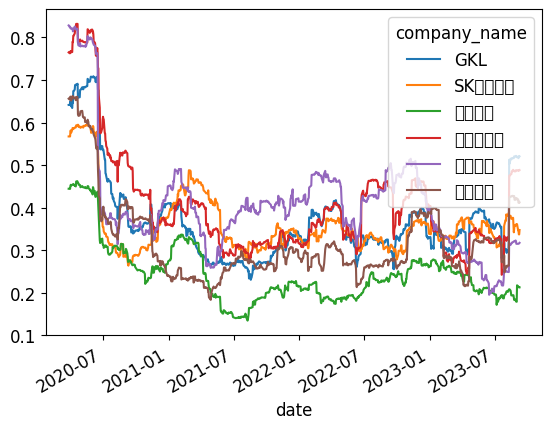

In [140]:
## 변동성을 연율화 시키면
annual_vol_df = vol_df*np.sqrt(252)
annual_vol_df.plot()

### What is pd.melt() ?

- melt() 함수는 데이터프레임을 재구조화하는데 사용
- 이를 통해 열을 행으로 변환 가능
- 주로 넓은 형식의 데이터를 긴 형식으로 변환할 때 활용 (pivot의 역행)

In [141]:
# 예시 데이터프레임 생성
data = {
    '이름': ['Alice', 'Bob', 'Charlie'],
    '수학': [85, 90, 78],
    '과학': [92, 88, 75],
    '영어': [75, 82, 88]
}

df = pd.DataFrame(data)

# 초기 데이터프레임 출력
print("초기 데이터프레임:")
df


초기 데이터프레임:


,이름,수학,과학,영어
0,Alice,85,92,75
1,Bob,90,88,82
2,Charlie,78,75,88


In [142]:
# melt() 함수를 사용하여 데이터프레임 재구조화
melted_df = pd.melt(df, id_vars=['이름'], var_name='과목', value_name='성적')

# 재구조화된 데이터프레임 출력
print("\n재구조화된 데이터프레임:")
melted_df


재구조화된 데이터프레임:


,이름,과목,성적
0,Alice,수학,85
1,Bob,수학,90
2,Charlie,수학,78
3,Alice,과학,92
4,Bob,과학,88
5,Charlie,과학,75
6,Alice,영어,75
7,Bob,영어,82
8,Charlie,영어,88


### 실전 데이터 전처리 example (2)

- 월말 주가 데이터를 추출한 이후 일간 주가 데이터에 다양한 방법으로 결합 시켜 본다

In [143]:
# 월말 기준 데이터 추출

# 1단계 index 를 'date' columns으로 교체 한다
raw_reindex = raw_df.set_index('date')

# 2단계 resample 함수를 이용해서 date에서 월말 데이터를 추출한다

# 월말 주가 데이터 추출
monthly_end_prices = raw_reindex.resample('M').last()

print(monthly_end_prices)

            A008770 A034230 A114090 A039130 A005930  A000660
date                                                        
2019-12-31   90,800  19,750  19,450  49,916  55,800   94,100
2020-01-31   87,400  17,000  18,300  43,860  56,400   93,500
2020-02-29   80,300  16,400  16,800  41,320  54,200   87,900
2020-03-31   70,500  12,950  13,500  36,241  47,750   83,300
2020-04-30   85,200  15,750  15,850  41,418  50,000   83,700
2020-05-31   79,200  14,500  14,900  39,660  50,700   81,500
2020-06-30   71,000  13,350  12,850  37,462  52,800   85,100
2020-07-31   70,300  13,100  12,750  36,876  57,900   82,800
2020-08-31   70,300  13,300  11,850  37,511  54,000   75,100
2020-09-30   76,100  13,750  12,400  38,292  58,200   84,000
2020-10-31   74,200  12,700  12,000  37,804  56,600   79,900
2020-11-30   80,000  14,800  15,200  51,870  66,700   97,500
2020-12-31   82,300  15,300  16,700  54,703  81,000  118,500
2021-01-31   80,900  15,800  15,350  56,657  82,000  122,500
2021-02-28   81,600  17,

In [144]:
# 월초 주가 데이터 추출
monthly_start_prices = raw_reindex.resample('MS').first()

print(monthly_start_prices)

           A008770 A034230 A114090 A039130 A005930  A000660
date                                                       
2019-12-01  90,800  19,750  19,450  49,916  55,800   94,100
2020-01-01  94,000  20,150  19,450  51,577  55,200   94,700
2020-02-01  90,300  17,300  18,300  44,739  57,200   94,700
2020-03-01  81,400  16,450  16,850  41,125  55,000   92,100
2020-04-01  67,600  12,150  12,700  36,241  45,800   78,400
2020-05-01  83,500  15,200  15,100  40,246  48,500   81,000
2020-06-01  80,400  14,700  15,000  40,148  51,200   83,600
2020-07-01  68,800  12,600  12,700  37,218  52,600   85,300
2020-08-01  69,300  12,850  12,600  35,997  56,800   81,800
2020-09-01  72,500  13,750  12,100  38,097  54,200   75,200
2020-10-01  75,700  13,650  12,300  38,390  58,700   83,200
2020-11-01  74,900  12,800  12,050  38,292  57,400   79,600
2020-12-01  81,000  15,700  15,950  53,628  67,800  100,500
2021-01-01  82,600  15,200  16,450  56,168  83,000  126,000
2021-02-01  81,100  15,800  15,350  56,8

In [147]:
## 6개 기업들의 주가가 들어간 csv data를 import 한다
path = '/week4_stock_fs_ratio.xlsx'
mkc_df = pd.read_excel(path, sheet_name = 'MKC')
pe_df = pd.read_excel(path, sheet_name = 'PE')
pb_df = pd.read_excel(path, sheet_name = 'PB')


In [148]:
mkc_df.head(5)

,date,A008770,A034230,A114090,A039130,A005930,A000660
0,2018-12-28,3002481256500,1714269367200,1540206183000,799193528000,231030584685000,44044143082500
1,2019-01-02,2869037645100,1673345164800,1481443296500,803840002000,231329073812500,44116943319000
2,2019-01-03,2853338396700,1696080832800,1496907214000,764344973000,224463823880000,42005736460500
3,2019-01-04,2794466215200,1787023504800,1561855667500,779446013500,223568356497500,42442537879500
4,2019-01-07,2786616591000,1827947707200,1540206183000,787577343000,231329073812500,42733738825500


실전 데이터 전처리 example (3)
- 시가총액 데이터와 재무 비율 data를 주가 data에 merge 시키기
- 데이터 기본 정보 탐색

In [149]:
mkc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1165 entries, 0 to 1164
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     1165 non-null   datetime64[ns]
 1   A008770  1165 non-null   int64         
 2   A034230  1165 non-null   int64         
 3   A114090  1165 non-null   int64         
 4   A039130  1165 non-null   int64         
 5   A005930  1165 non-null   int64         
 6   A000660  1165 non-null   int64         
dtypes: datetime64[ns](1), int64(6)
memory usage: 63.8 KB


In [150]:
pe_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1165 entries, 0 to 1164
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     1165 non-null   datetime64[ns]
 1   A008770  1165 non-null   float64       
 2   A034230  1165 non-null   float64       
 3   A114090  1165 non-null   float64       
 4   A039130  1165 non-null   float64       
 5   A005930  1165 non-null   float64       
 6   A000660  1165 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 63.8 KB


In [151]:
pb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1165 entries, 0 to 1164
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     1165 non-null   datetime64[ns]
 1   A008770  1165 non-null   float64       
 2   A034230  1165 non-null   float64       
 3   A114090  1165 non-null   float64       
 4   A039130  1165 non-null   float64       
 5   A005930  1165 non-null   float64       
 6   A000660  1165 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 63.8 KB


In [152]:
mkc_df.describe()

,A008770,A034230,A114090,A039130,A005930,A000660
count,1.165000e+03,1.165000e+03,1.165000e+03,1.165000e+03,1.165000e+03,1.165000e+03
mean,3.203570e+12,1.481440e+12,1.052077e+12,8.167179e+11,3.723735e+14,7.101972e+13
std,3.427467e+11,1.720980e+11,1.977666e+11,2.166056e+11,7.367077e+13,1.450327e+13
min,2.425534e+12,8.903288e+11,6.742268e+11,3.875093e+11,2.235684e+14,4.200574e+13
25%,2.947534e+12,1.360424e+12,9.061856e+11,5.819610e+11,3.134136e+14,5.962339e+13
50%,3.167323e+12,1.496007e+12,1.008247e+12,8.247491e+11,3.635598e+14,6.755862e+13
75%,3.371414e+12,1.609685e+12,1.200000e+12,9.783903e+11,4.280334e+14,8.437547e+13
max,4.513534e+12,1.982550e+12,1.605155e+12,1.290769e+12,5.432502e+14,1.081084e+14


In [153]:
pe_df.describe()

,A008770,A034230,A114090,A039130,A005930,A000660
count,1165.000000,1165.000000,1165.000000,1165.000000,1165.000000,1165.000000
mean,21.885021,2.877777,-6.104730,-5.027717,13.445614,18.169047
std,55.561721,60.785036,22.260615,47.432043,5.433519,12.290054
min,-72.560000,-90.450000,-57.110000,-88.250000,6.220000,2.700000
25%,-12.380000,-29.000000,-15.580000,-25.690000,8.280000,6.630000
50%,19.040000,-13.430000,-7.950000,-12.660000,11.550000,18.220000
75%,34.590000,61.250000,14.400000,-5.150000,18.790000,29.710000
max,125.770000,131.250000,20.650000,104.790000,25.580000,43.730000


In [154]:
# 원본 데이터의 칼럼이름 저장

old_col = mkc_df.columns.tolist()
new_col = ['date'] + [col +'_'+ 'mck'  for col in old_col[1:]]

mck_df_re = mkc_df.copy()
mck_df_re.columns = new_col
mck_df_re

,date,A008770_mck,A034230_mck,A114090_mck,A039130_mck,A005930_mck,A000660_mck
0,2018-12-28,3002481256500,1714269367200,1540206183000,799193528000,231030584685000,44044143082500
1,2019-01-02,2869037645100,1673345164800,1481443296500,803840002000,231329073812500,44116943319000
2,2019-01-03,2853338396700,1696080832800,1496907214000,764344973000,224463823880000,42005736460500
3,2019-01-04,2794466215200,1787023504800,1561855667500,779446013500,223568356497500,42442537879500
4,2019-01-07,2786616591000,1827947707200,1540206183000,787577343000,231329073812500,42733738825500
...,...,...,...,...,...,...,...
1160,2023-09-08,3457759460100,1610007266280,1084948451800,765069124500,419675713265000,82773868900500
1161,2023-09-11,3528406077900,1602672381240,1094226802300,758653450500,422660604540000,84375474103500
1162,2023-09-12,3414586527000,1552245046590,1057731957000,755445613500,420869669775000,84957875995500
1163,2023-09-13,3383188030200,1555316321250,1059587627100,742614265500,423257582795000,86268280252500


In [155]:
mkc_df

,date,A008770,A034230,A114090,A039130,A005930,A000660
0,2018-12-28,3002481256500,1714269367200,1540206183000,799193528000,231030584685000,44044143082500
1,2019-01-02,2869037645100,1673345164800,1481443296500,803840002000,231329073812500,44116943319000
2,2019-01-03,2853338396700,1696080832800,1496907214000,764344973000,224463823880000,42005736460500
3,2019-01-04,2794466215200,1787023504800,1561855667500,779446013500,223568356497500,42442537879500
4,2019-01-07,2786616591000,1827947707200,1540206183000,787577343000,231329073812500,42733738825500
...,...,...,...,...,...,...,...
1160,2023-09-08,3457759460100,1610007266280,1084948451800,765069124500,419675713265000,82773868900500
1161,2023-09-11,3528406077900,1602672381240,1094226802300,758653450500,422660604540000,84375474103500
1162,2023-09-12,3414586527000,1552245046590,1057731957000,755445613500,420869669775000,84957875995500
1163,2023-09-13,3383188030200,1555316321250,1059587627100,742614265500,423257582795000,86268280252500


In [157]:
merge_left = pd.merge(raw_df, mck_df_re, on = 'date', how='left')
merge_left

,date,A008770,A034230,A114090,A039130,A005930,A000660,A008770_mck,A034230_mck,A114090_mck,A039130_mck,A005930_mck,A000660_mck
0,2019-12-30,"90,800","19,750","19,450","49,916","55,800","94,100",3563729386800,1796117772000,1203092781500,593587053500,333113866290000,68505022546500
1,2020-01-02,"94,000","20,150","19,450","51,577","55,200","94,700",3689323374000,1832494840800,1203092781500,613334568000,329531996760000,68941823965500
2,2020-01-03,"95,300","19,900","19,600","51,577","55,500","94,500",3740345931300,1809759172800,1212371132000,613334568000,331322931525000,68796223492500
3,2020-01-06,"94,900","19,000","19,050","49,428","55,500","94,300",3724646682900,1727910768000,1178350513500,587778961000,331322931525000,68650623019500
4,2020-01-07,"99,400","20,000","20,000","50,210","55,800","94,000",3901263227400,1818853440000,1237113400000,597071909000,333113866290000,68432222310000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
910,2023-09-04,"88,000","17,010","16,520","48,600","71,200","119,200",3453834648000,1559579931630,1021855668400,779504391000,425048517560000,86777881908000
911,2023-09-05,"88,400","16,850","16,600","48,200","70,700","119,400",3469533896400,1544910161550,1026804122000,773088717000,422063626285000,86923482381000
912,2023-09-06,"88,900","17,250","17,180","47,800","70,000","118,200",3489157956900,1581584586750,1062680410600,766673043000,417884778500000,86049879543000
913,2023-09-07,"86,900","17,140","17,060","47,100","70,400","118,500",3410661714900,1571499119820,1055257730200,755445613500,420272691520000,86268280252500


In [158]:
merge_right = pd.merge(raw_df, mck_df_re, on = 'date', how='right')
merge_right

,date,A008770,A034230,A114090,A039130,A005930,A000660,A008770_mck,A034230_mck,A114090_mck,A039130_mck,A005930_mck,A000660_mck
0,2018-12-28,NaN,NaN,NaN,NaN,NaN,NaN,3002481256500,1714269367200,1540206183000,799193528000,231030584685000,44044143082500
1,2019-01-02,NaN,NaN,NaN,NaN,NaN,NaN,2869037645100,1673345164800,1481443296500,803840002000,231329073812500,44116943319000
2,2019-01-03,NaN,NaN,NaN,NaN,NaN,NaN,2853338396700,1696080832800,1496907214000,764344973000,224463823880000,42005736460500
3,2019-01-04,NaN,NaN,NaN,NaN,NaN,NaN,2794466215200,1787023504800,1561855667500,779446013500,223568356497500,42442537879500
4,2019-01-07,NaN,NaN,NaN,NaN,NaN,NaN,2786616591000,1827947707200,1540206183000,787577343000,231329073812500,42733738825500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1160,2023-09-08,"88,100","17,560","17,540","47,700","70,300","113,700",3457759460100,1610007266280,1084948451800,765069124500,419675713265000,82773868900500
1161,2023-09-11,NaN,NaN,NaN,NaN,NaN,NaN,3528406077900,1602672381240,1094226802300,758653450500,422660604540000,84375474103500
1162,2023-09-12,NaN,NaN,NaN,NaN,NaN,NaN,3414586527000,1552245046590,1057731957000,755445613500,420869669775000,84957875995500
1163,2023-09-13,NaN,NaN,NaN,NaN,NaN,NaN,3383188030200,1555316321250,1059587627100,742614265500,423257582795000,86268280252500


In [159]:
#merge_right.dropna()

In [160]:
merge_inner = pd.merge(raw_df, mck_df_re, on = 'date', how='inner')
merge_inner

,date,A008770,A034230,A114090,A039130,A005930,A000660,A008770_mck,A034230_mck,A114090_mck,A039130_mck,A005930_mck,A000660_mck
0,2019-12-30,"90,800","19,750","19,450","49,916","55,800","94,100",3563729386800,1796117772000,1203092781500,593587053500,333113866290000,68505022546500
1,2020-01-02,"94,000","20,150","19,450","51,577","55,200","94,700",3689323374000,1832494840800,1203092781500,613334568000,329531996760000,68941823965500
2,2020-01-03,"95,300","19,900","19,600","51,577","55,500","94,500",3740345931300,1809759172800,1212371132000,613334568000,331322931525000,68796223492500
3,2020-01-06,"94,900","19,000","19,050","49,428","55,500","94,300",3724646682900,1727910768000,1178350513500,587778961000,331322931525000,68650623019500
4,2020-01-07,"99,400","20,000","20,000","50,210","55,800","94,000",3901263227400,1818853440000,1237113400000,597071909000,333113866290000,68432222310000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
910,2023-09-04,"88,000","17,010","16,520","48,600","71,200","119,200",3453834648000,1559579931630,1021855668400,779504391000,425048517560000,86777881908000
911,2023-09-05,"88,400","16,850","16,600","48,200","70,700","119,400",3469533896400,1544910161550,1026804122000,773088717000,422063626285000,86923482381000
912,2023-09-06,"88,900","17,250","17,180","47,800","70,000","118,200",3489157956900,1581584586750,1062680410600,766673043000,417884778500000,86049879543000
913,2023-09-07,"86,900","17,140","17,060","47,100","70,400","118,500",3410661714900,1571499119820,1055257730200,755445613500,420272691520000,86268280252500


In [161]:
# mck_df 를 재구조화 한다! melt 이용

melted_mkc = pd.melt(mkc_df, id_vars=['date'], var_name='code', value_name='market_cap')
melted_mkc

,date,code,market_cap
0,2018-12-28,A008770,3002481256500
1,2019-01-02,A008770,2869037645100
2,2019-01-03,A008770,2853338396700
3,2019-01-04,A008770,2794466215200
4,2019-01-07,A008770,2786616591000
...,...,...,...
6985,2023-09-08,A000660,82773868900500
6986,2023-09-11,A000660,84375474103500
6987,2023-09-12,A000660,84957875995500
6988,2023-09-13,A000660,86268280252500


In [162]:
mkc_df

,date,A008770,A034230,A114090,A039130,A005930,A000660
0,2018-12-28,3002481256500,1714269367200,1540206183000,799193528000,231030584685000,44044143082500
1,2019-01-02,2869037645100,1673345164800,1481443296500,803840002000,231329073812500,44116943319000
2,2019-01-03,2853338396700,1696080832800,1496907214000,764344973000,224463823880000,42005736460500
3,2019-01-04,2794466215200,1787023504800,1561855667500,779446013500,223568356497500,42442537879500
4,2019-01-07,2786616591000,1827947707200,1540206183000,787577343000,231329073812500,42733738825500
...,...,...,...,...,...,...,...
1160,2023-09-08,3457759460100,1610007266280,1084948451800,765069124500,419675713265000,82773868900500
1161,2023-09-11,3528406077900,1602672381240,1094226802300,758653450500,422660604540000,84375474103500
1162,2023-09-12,3414586527000,1552245046590,1057731957000,755445613500,420869669775000,84957875995500
1163,2023-09-13,3383188030200,1555316321250,1059587627100,742614265500,423257582795000,86268280252500


In [163]:
merge_test = pd.merge(stock_price_df, melted_mkc, on = ['date', 'code'], how='left')
merge_test

,date,code,company_name,price,log_price,log_ret,ma5,ma20,ma60,vol5,vol20,vol60,market_cap
0,2019-12-30,A008770,호텔신라,90800,11.416415,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3563729386800
1,2020-01-02,A008770,호텔신라,94000,11.451050,0.034635,NaN,NaN,NaN,NaN,NaN,NaN,3689323374000
2,2020-01-03,A008770,호텔신라,95300,11.464785,0.013735,NaN,NaN,NaN,NaN,NaN,NaN,3740345931300
3,2020-01-06,A008770,호텔신라,94900,11.460579,-0.004206,NaN,NaN,NaN,NaN,NaN,NaN,3724646682900
4,2020-01-07,A008770,호텔신라,99400,11.506907,0.046328,94880.0,NaN,NaN,NaN,NaN,NaN,3901263227400
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5485,2023-09-04,A000660,SK하이닉스,119200,11.688558,-0.006689,119800.0,117835.0,117125.000000,0.016434,0.018800,0.021850,86777881908000
5486,2023-09-05,A000660,SK하이닉스,119400,11.690234,0.001676,119960.0,117710.0,117201.666667,0.013242,0.018465,0.021837,86923482381000
5487,2023-09-06,A000660,SK하이닉스,118200,11.680133,-0.010101,119720.0,117690.0,117180.000000,0.013665,0.017543,0.021253,86049879543000
5488,2023-09-07,A000660,SK하이닉스,118500,11.682668,0.002535,119060.0,117690.0,117175.000000,0.007530,0.017553,0.021243,86268280252500


In [164]:
merge_test[merge_test['company_name'] == '호텔신라'][['log_ret', 'market_cap']]

,log_ret,market_cap
0,NaN,3563729386800
1,0.034635,3689323374000
2,0.013735,3740345931300
3,-0.004206,3724646682900
4,0.046328,3901263227400
...,...,...
910,-0.002270,3453834648000
911,0.004535,3469533896400
912,0.005640,3489157956900
913,-0.022754,3410661714900


# practice) mkc_df, pe_df, pb_df 를 결합시켜 보자

In [165]:
pe_df

,date,A008770,A034230,A114090,A039130,A005930,A000660
0,2018-12-28,121.02,-90.45,19.12,61.82,7.14,4.14
1,2019-01-02,26.50,-79.50,19.06,93.69,6.43,2.84
2,2019-01-03,26.36,-80.58,19.26,89.09,6.24,2.70
3,2019-01-04,25.82,-84.90,20.09,90.85,6.22,2.73
4,2019-01-07,25.74,-86.84,19.81,91.79,6.43,2.75
...,...,...,...,...,...,...,...
1160,2023-09-08,-70.25,63.00,-47.70,-10.92,8.73,37.13
1161,2023-09-11,-71.68,62.72,-48.11,-10.82,8.79,37.84
1162,2023-09-12,-69.37,60.74,-46.51,-10.78,8.75,38.11
1163,2023-09-13,-68.73,60.81,-46.59,-10.60,8.80,38.69


### 데이터 결합 방식 정리

- pd.concat()

<img src = 'https://drive.google.com/uc?id=1Coa-UrupEh0I0sNLgbKMkqYr33FuKi3s' height = 400 width = 700>
</center>

- pd.merge()

<img src = 'https://drive.google.com/uc?id=1pnAF_S3r13w1xFkx-TLnKzPWb0gCMIVi' height = 400 width = 700>
</center>

- pd.pivot()

<img src = 'https://drive.google.com/uc?id=1x1nXgI2faQHY85NV98x2Z-L3WAcbZYMV' height = 400 width = 700>
</center>

- pd.melt()

<img src = 'https://drive.google.com/uc?id=18ONz60sD8C1e0h3KyRWIJcq3t-RcOTyE' height = 400 width = 700>
</center>

### 실전 데이터 전처리 example (3)

In [171]:
# import data

path = '/week4_basic_econ_data.csv.csv의 사본'
econ_df = pd.read_csv(path)
econ_df

,Unnamed: 0,TIME,ITEM_NAME1,DATA_VALUE
0,0,20100104,KOSPI지수,1696.140
1,1,20100105,KOSPI지수,1690.620
2,2,20100106,KOSPI지수,1705.320
3,3,20100107,KOSPI지수,1683.450
4,4,20100108,KOSPI지수,1695.260
...,...,...,...,...
50890,3399,20230915,"회사채(3년, AA-, 민평)",4.604
50891,3400,20230918,"회사채(3년, AA-, 민평)",4.651
50892,3401,20230919,"회사채(3년, AA-, 민평)",4.642
50893,3402,20230920,"회사채(3년, AA-, 민평)",4.637


In [172]:
econ_df = econ_df.drop(columns=['Unnamed: 0'])
econ_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50895 entries, 0 to 50894
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   TIME        50895 non-null  int64  
 1   ITEM_NAME1  50895 non-null  object 
 2   DATA_VALUE  50895 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.2+ MB


In [173]:
econ_df['TIME'] = econ_df['TIME'].astype(str)
econ_df['TIME'] = pd.to_datetime(econ_df['TIME'], format='%Y%m%d')

In [174]:
econ_df = econ_df.rename(columns={'TIME':'Date'})

In [ ]:
# data의 pivot

In [175]:
econ_data_df = econ_df.pivot(index = 'Date', columns='ITEM_NAME1', values= 'DATA_VALUE')
econ_data_df

ITEM_NAME1,KOSDAQ지수,KOSPI지수,"거래대금(억원 : 코스닥시장, 잠정치)","거래대금(주식시장 , 잠정치)","거래량(만주 : 코스닥시장, 잠정치)","거래량(주식시장, 잠정치)",국고채(10년),국고채(1년),국고채(3년),"시가총액(주식시장, 잠정치)","주식시장-거래대금(억원, 시간외거래분 포함)","주식시장-거래량(만주, 시간외거래분 포함)","회사채(3년, AA-)","회사채(3년, AA-, 민평)","회사채(3년, BBB-)"
Date,,,,,,,,,,,,,,,
2010-01-04,528.09,1696.14,24075.0,42144.0,67163.0,29108.0,5.430,3.500,4.440,8947320.0,43646.0,29655.0,5.560,5.560,11.610
2010-01-05,533.09,1690.62,32557.0,66941.0,89254.0,40204.0,5.350,3.430,4.360,8919010.0,68307.0,40885.0,5.480,5.480,11.530
2010-01-06,539.12,1705.32,34518.0,62819.0,113959.0,42048.0,5.380,3.460,4.430,8996450.0,63910.0,42604.0,5.540,5.530,11.580
2010-01-07,535.52,1683.45,36803.0,73777.0,118819.0,45646.0,5.290,3.390,4.320,8881110.0,74984.0,46240.0,5.440,5.430,11.490
2010-01-08,538.96,1695.26,30053.0,67852.0,89869.0,37136.0,5.360,3.380,4.360,8940800.0,69651.0,37995.0,5.470,5.460,11.530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-15,899.03,2601.28,96372.0,117168.0,94182.0,43263.0,3.928,3.645,3.850,20634550.0,119952.0,44173.0,4.608,4.604,11.029
2023-09-18,891.29,2574.72,82850.0,86303.0,90666.0,40844.0,3.982,3.664,3.891,20420040.0,87721.0,41629.0,4.648,4.651,11.074
2023-09-19,883.89,2559.21,87231.0,76491.0,104578.0,45591.0,3.952,3.652,3.887,20301250.0,78273.0,46234.0,4.641,4.642,11.067


In [176]:
## 장단기 금리 스프레드 측정

yield_spread = econ_data_df['국고채(10년)'] - econ_data_df['국고채(3년)']
yield_spread = pd.DataFrame(yield_spread)
yield_spread.columns = ['yield_spread']
# yield_spread.plot()
yield_spread['yield_change'] = yield_spread['yield_spread'].pct_change()

- 장단기 금리 스프레드란?

장단기 금리 스프레드는 장기와 단기 금리 간의 차이를 나타내는 지표입니다. 일반적으로 장기 금리는 높을수록, 단기 금리는 낮을수록 경제가 안정적이라고 여겨집니다. 스프레드가 높을수록 경제 전망이 밝고, 스프레드가 좁을수록 불확실성이 높다고 볼 수 있습니다.

주로 미국 국채를 기반으로 분석되는데, 일반적으로 10년물 국채 금리와 2년물 국채 금리의 차이를 나타냅니다. 이는 경제 전망을 예측하는 중요한 지표 중 하나로 간주됩니다.

1. **경기 침체 예측:**
   - 스프레드가 좁아지면, 즉 장단기 금리가 가까워지면 경제 전망이 불확실해질 수 있습니다. 이는 일반적으로 경기 침체의 조짐으로 해석됩니다.

2. **경기 회복 예측:**
   - 스프레드가 넓어지면, 장기 금리가 상승하고 단기 금리가 하락하는 것을 나타낼 수 있습니다. 이는 경기 회복의 조짐으로 해석됩니다.

3. **금리 인상 예측:**
   - 스프레드가 좁아질 경우, 중앙은행이 단기 금리를 인상할 가능성이 높다고 볼 수 있습니다. 이는 물가 상승을 억제하고 경제 안정을 유지하려는 노력의 일환입니다.

4. **금리 인하 예측:**
   - 반대로 스프레드가 넓어지면, 중앙은행이 단기 금리를 낮출 가능성이 있습니다. 이는 경기 부양을 위한 조치로 이해될 수 있습니다.

5. **투자자 신호:**
   - 장단기 금리 스프레드는 투자자들에게 시장의 미래 전망에 대한 정보를 제공할 수 있습니다.



<Axes: xlabel='Date'>

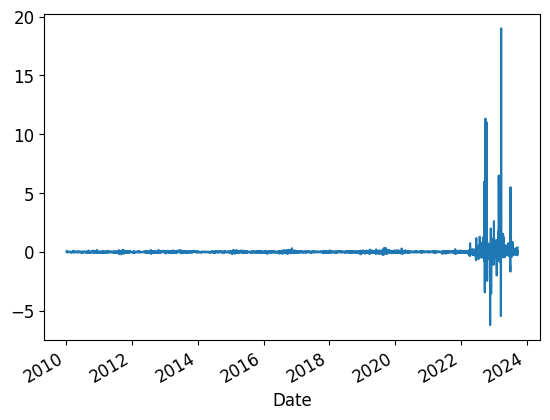

In [177]:
yield_spread['yield_change'].plot()

In [178]:
## 코스피 Data의 가공

kospi_df = econ_data_df[['KOSPI지수']].copy()
kospi_df['KOSPI_change'] = kospi_df[['KOSPI지수']].pct_change()
kospi_df

ITEM_NAME1,KOSPI지수,KOSPI_change
Date,,
2010-01-04,1696.14,NaN
2010-01-05,1690.62,-0.003254
2010-01-06,1705.32,0.008695
2010-01-07,1683.45,-0.012825
2010-01-08,1695.26,0.007015
...,...,...
2023-09-15,2601.28,0.011034
2023-09-18,2574.72,-0.010210
2023-09-19,2559.21,-0.006024


In [179]:
## 두개 DafaFrame의 결합

df = pd.concat([kospi_df, yield_spread], axis=1)

## 시차의 선후 관계가 존재하기 때문에 yield_change를 하루 shift 해준다

df['yield_change_sht'] = df['yield_change'].shift(1)

In [180]:
data_df = df[['KOSPI_change', 'yield_change_sht']]
data_df_drop = data_df.dropna()
data_df_drop = data_df_drop.loc['2020-01':'2021-12']

In [181]:
data_df_drop.corr()

,KOSPI_change,yield_change_sht
KOSPI_change,1.000000,-0.088995
yield_change_sht,-0.088995,1.000000


In [182]:
data_df_drop.head(20)

,KOSPI_change,yield_change_sht
Date,,
2020-01-02,-0.010238,0.000000
2020-01-03,0.000593,-0.037152
2020-01-06,-0.009828,-0.083601
2020-01-07,0.009499,-0.073684
2020-01-08,-0.011137,0.068182
2020-01-09,0.016334,-0.053191
2020-01-10,0.009120,0.014981
2020-01-13,0.010365,0.036900
2020-01-14,0.004315,0.106762


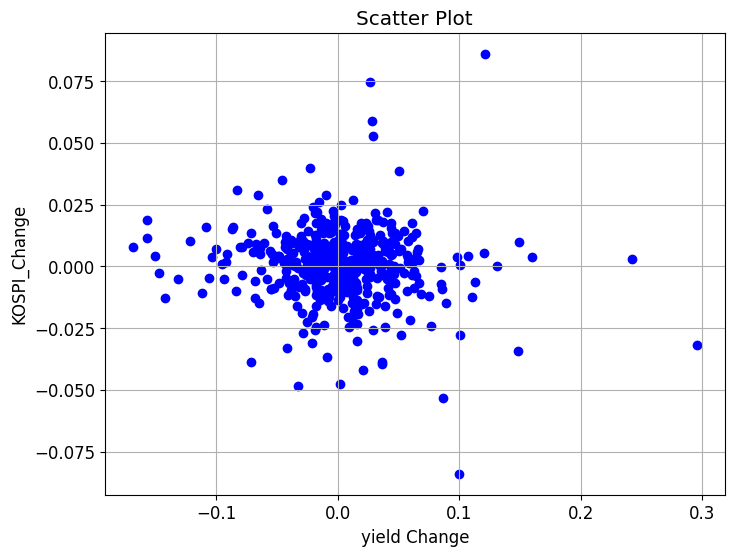

In [183]:
## 산점도(scatter plot) 그리기
plt.figure(figsize=(8, 6))
plt.scatter(data_df_drop['yield_change_sht'], data_df_drop['KOSPI_change'], color='blue')
plt.title('Scatter Plot')
plt.xlabel('yield Change')
plt.ylabel('KOSPI_Change')
plt.grid(True)

# 그래프 표시
plt.show()

In [184]:
import statsmodels.api as sm

# 독립변수(x)와 종속변수(y) 설정
x = data_df_drop['yield_change_sht']
y = data_df_drop['KOSPI_change']

# 상수항 추가
x = sm.add_constant(x)

# 회귀모델 생성
model = sm.OLS(y, x)

# 회귀분석 실행
results = model.fit()

# 결과 출력
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           KOSPI_change   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     3.960
Date:                Sat, 23 Sep 2023   Prob (F-statistic):             0.0472
Time:                        07:27:52   Log-Likelihood:                 1403.6
No. Observations:                 498   AIC:                            -2803.
Df Residuals:                     496   BIC:                            -2795.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0008      0.001  

주어진 코드는 파이썬에서 회귀 분석을 수행하는 과정을 나타내고 있습니다. 각 단계를 설명해보겠습니다:

1. `import statsmodels.api as sm`: 먼저 `statsmodels` 라이브러리를 `sm`이라는 별칭으로 불러옵니다. `statsmodels`는 통계 모델링을 위한 파이썬 라이브러리입니다.

2. `x = data_df_drop['yield_change_sht'], y = data_df_drop['KOSPI_change']`: 독립 변수(x)와 종속 변수(y)를 설정합니다. 여기서 `data_df_drop`는 데이터프레임일 것이며, 'yield_change_sht' 열을 x로, 'KOSPI_change' 열을 y로 설정합니다.

3. `x = sm.add_constant(x)`: 회귀 분석에서 상수항을 추가하기 위해 `add_constant` 함수를 사용하여 독립 변수에 상수항을 추가합니다. 이렇게 함으로써 회귀식이 y 절편을 포함하게 됩니다.

4. `model = sm.OLS(y, x)`: 최소 제곱법(OLS, Ordinary Least Squares)을 사용하여 회귀 모델을 생성합니다. 이 단계에서는 독립 변수와 종속 변수를 사용하여 모델을 초기화합니다.

5. `results = model.fit()`: 모델을 훈련시킵니다. 이는 주어진 데이터를 사용하여 회귀식의 계수(회귀계수)를 조정하는 과정입니다.

6. `print(results.summary())`: 최종 결과를 출력합니다. 이 결과에는 회귀식의 계수, R-squared 값, p-value 등이 포함됩니다. 이 정보들은 회귀 모델의 품질과 통계적 유의성을 평가하는데 사용됩니다.

이 코드는 주어진 데이터를 사용하여 `yield_change_sht`를 독립 변수로, `KOSPI_change`를 종속 변수로 하는 단순 선형 회귀 모델을 만들고 결과를 출력합니다. 이를 통해 두 변수 간의 선형 관계를 평가하고 예측할 수 있습니다.

실전 데이터 전처리 example (4)

In [185]:
path = '/week4_news_result_sokcho.xlsx'
news_df = pd.read_excel(path)

In [186]:
news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10059 entries, 0 to 10058
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   뉴스 식별자             10059 non-null  float64
 1   일자                 10059 non-null  int64  
 2   언론사                10059 non-null  object 
 3   기고자                9305 non-null   object 
 4   제목                 10059 non-null  object 
 5   통합 분류1             10059 non-null  object 
 6   통합 분류2             8119 non-null   object 
 7   통합 분류3             6771 non-null   object 
 8   사건/사고 분류1          2018 non-null   object 
 9   사건/사고 분류2          547 non-null    object 
 10  사건/사고 분류3          141 non-null    object 
 11  인물                 5001 non-null   object 
 12  위치                 10024 non-null  object 
 13  기관                 9909 non-null   object 
 14  키워드                10059 non-null  object 
 15  특성추출(가중치순 상위 50개)  10059 non-null  object 
 16  본문                 100

In [187]:
# '일자' 칼럼을 datetime 형식으로 변환합니다.
news_df['일자'] = pd.to_datetime(news_df['일자'], format='%Y%m%d')
news_df['year'] = news_df['일자'].dt.year
news_df['month'] = news_df['일자'].dt.month

## groupby 를 이용한 데이터 합산

news_count = news_df.groupby(['year', 'month'])[['뉴스 식별자']].count().reset_index()
news_count = news_count.rename(columns={'뉴스 식별자' : '관련뉴스수'})
news_count.head(10)

,year,month,관련뉴스수
0,2020,1,203
1,2020,2,322
2,2020,3,381
3,2020,4,274
4,2020,5,317
5,2020,6,266
6,2020,7,297
7,2020,8,284
8,2020,9,208
9,2020,10,167


In [188]:
news_count_by_press = news_df.groupby(['year', 'month', '언론사'])[['뉴스 식별자']].count().reset_index()
news_count_by_press = news_count_by_press.rename(columns={'뉴스 식별자' : '관련뉴스수'})
news_count_by_press.head(20)

,year,month,언론사,관련뉴스수
0,2020,1,경향신문,2
1,2020,1,국민일보,13
2,2020,1,내일신문,2
3,2020,1,동아일보,6
4,2020,1,매일경제,30
5,2020,1,머니투데이,13
6,2020,1,문화일보,5
7,2020,1,서울경제,7
8,2020,1,서울신문,15
9,2020,1,세계일보,7


In [189]:
! pip install konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 33.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 46.1 MB/s eta 0:00:00


In [190]:
from konlpy.tag import Okt
from konlpy.tag import Kkma
from konlpy.tag import Twitter
from collections import Counter


def make_noun_doc(text):
  twitter = Okt()
  text_nouns = twitter.nouns(text)
  noun_count = Counter(text_nouns)
  str_result = ' '.join(text_nouns)

  return text_nouns, str_result, noun_count

In [193]:
news_df_re = news_df.iloc[:50]

text = news_df_re['키워드'].tolist()
txt = ' '.join(text)

a,b,n_count = make_noun_doc(txt)
word_freq_df = pd.DataFrame(list(n_count.values()), index=list(n_count.keys()), columns=['frequency'])
word_freq_df = word_freq_df.sort_values(by=['frequency'], ascending= False)

이 코드는 한글 텍스트 데이터에서 명사를 추출하고, 명사들의 빈도를 계산하여 데이터프레임으로 정리하는 작업을 수행합니다.

1. `from konlpy.tag import Okt`, `from konlpy.tag import Kkma`, `from konlpy.tag import Twitter`: `konlpy` 라이브러리에서 한글 형태소 분석을 위한 Okt, Kkma, Twitter 클래스를 import합니다. 이들은 형태소 분석기로, 각각 다른 방법으로 한글 텍스트를 형태소 단위로 분석할 수 있습니다.

2. `from collections import Counter`: 파이썬 내장 라이브러리인 collections에서 Counter 클래스를 import합니다. 이 클래스는 데이터의 개수를 셀 때 유용하게 사용됩니다.

3. `def make_noun_doc(text):`: `make_noun_doc` 라는 함수를 정의합니다. 이 함수는 텍스트를 입력으로 받아 명사를 추출하고, 추출된 명사들을 튜플로 반환합니다.

   - `twitter = Okt()`: Okt 클래스의 인스턴스를 생성합니다. 이는 한글 형태소 분석을 위한 객체입니다.

   - `text_nouns = twitter.nouns(text)`: Okt 객체를 사용하여 입력된 `text`에서 명사를 추출하여 `text_nouns`에 저장합니다.

   - `noun_count = Counter(text_nouns)`: Counter 클래스를 사용하여 `text_nouns` 리스트에 있는 명사들의 개수를 세어 `noun_count`에 저장합니다.

   - `str_result = ' '.join(text_nouns)`: 추출된 명사들을 공백을 기준으로 하나의 문자열로 합쳐서 `str_result`에 저장합니다.

   - 함수는 `text_nouns`, `str_result`, `noun_count`를 반환합니다.

4. `news_df_re = news_df.iloc[:-100]`: `news_df` 데이터프레임에서 마지막 100개의 행을 제외한 나머지를 `news_df_re`에 저장합니다.

5. `text = news_df_re['키워드'].tolist()`: `news_df_re`의 '키워드' 열의 값을 리스트로 변환하여 `text`에 저장합니다.

6. `txt = ' '.join(text)`: `text` 리스트의 요소들을 공백을 기준으로 하나의 문자열로 합쳐서 `txt`에 저장합니다.

7. `a,b,n_count = make_noun_doc(txt)`: 앞서 정의한 `make_noun_doc` 함수를 사용하여 `txt`에서 명사를 추출하고, 그 결과를 `a`, `b`, `n_count`에 저장합니다.

8. `word_freq_df = pd.DataFrame(list(n_count.values()), index=list(n_count.keys()), columns=['frequency'])`: `n_count` 딕셔너리에서 명사와 그에 대한 빈도를 추출하여 데이터프레임으로 만듭니다. 열 이름은 'frequency'로 지정됩니다.

9. `word_freq_df = word_freq_df.sort_values(by=['frequency'], ascending= False)`: 'frequency' 열을 기준으로 내림차순으로 데이터프레임을 정렬합니다. 즉, 가장 빈도가 높은 명사가 위에 위치하게 됩니다.

In [192]:
txt

'강원특별자치,6개,문화상,수상자,선정,10월,행사,강원예,술인,한마당,시상,강원특별자치,전경,파이낸셜뉴스,강원,특별,자치,문화상,수상자,전수관장,기연옥,춘천의병아리랑,6명,선정,강원,특별,자치도,6개,후보자,추천,심사위원회,심사,2차,심사,6개,1명,6명,수상자,최종,확정,전통예술,의병아리,전수관,건립,의병아리랑,민요장르,발굴,강원의병,역사,가치,공헌,전수관장,기연옥,춘천의병아리랑,선정,향토문화연구부문,30여,선사,역사시대,유적,조사연구,강원,지역,향토,문화유산,가치,전국,공헌,이상수,가톨릭,관동대,박물관,학예,실장,수상자,이름,문학부문,대마리,지뢰,마을,작품,군민들,분단,지역,철원,군민,애환,정춘근,시인,공연예술부문,예술감독,연출가,강원,강원연극,우수성,변유정,한국연극협회,강원,지회,회원,문화상,수상,영예,전시예술부문,개인전,초대전,참가,저변확대,지역,미술,저변,확대,노력,박동국,강원,미술,협회,속초,지부,고문,체육부문,전국,고교,야구,대회,우승,강원체육,위상,최재호,강릉고,야구팀,감독,수상자,선정,김진태,강원,특별,자치,지사,전통,강원특별자치,문화상,시상,지역,문화,진흥,도내,문화,예술인,지속,발굴,예술인들,자긍심,적극,지원,10월,인제잔디구장,개최,강원예,술인,한마당,행사,문화상,시상,진행,예정 말씀,먹물,심방,근육,문신,얼룩,세포들,한국,번역,출간,권오경,미국명,장편,소설,인센디어리스,문장,신앙,전직,성직자,의미,여성,광신도,신흥,종교,설계,교주,3인,마찰,불꽃,소설,임신,중절,수술,전문,병원,폭탄,테러,최악,결과,언어,번역,매체,미국,리뷰,인센디어리스,세계,최대,규모,독서,리뷰,사이트,리즈,평점,댓글,기록,애플TV,드라마화,확정,피로,테러극,유명세,선정,소재,차원,유의미,주인공,피비,종교,근본주의자,한국,이민자,근본주의,맹신,경계인,권오경,작가,3세,미국,이민,소설,한국,이민자,시장,세계,출판,한국,작가,출판상,전미도서상,뉴욕타임스,매체,미국,유력,스테디셀러,넷플릭스,온라인동영상서비스,OTT,영상화,시장,장르,범주,급부상,이경재,문학,평론가,한동안,

In [194]:
' '.join(text)

'강원특별자치,6개,문화상,수상자,선정,10월,행사,강원예,술인,한마당,시상,강원특별자치,전경,파이낸셜뉴스,강원,특별,자치,문화상,수상자,전수관장,기연옥,춘천의병아리랑,6명,선정,강원,특별,자치도,6개,후보자,추천,심사위원회,심사,2차,심사,6개,1명,6명,수상자,최종,확정,전통예술,의병아리,전수관,건립,의병아리랑,민요장르,발굴,강원의병,역사,가치,공헌,전수관장,기연옥,춘천의병아리랑,선정,향토문화연구부문,30여,선사,역사시대,유적,조사연구,강원,지역,향토,문화유산,가치,전국,공헌,이상수,가톨릭,관동대,박물관,학예,실장,수상자,이름,문학부문,대마리,지뢰,마을,작품,군민들,분단,지역,철원,군민,애환,정춘근,시인,공연예술부문,예술감독,연출가,강원,강원연극,우수성,변유정,한국연극협회,강원,지회,회원,문화상,수상,영예,전시예술부문,개인전,초대전,참가,저변확대,지역,미술,저변,확대,노력,박동국,강원,미술,협회,속초,지부,고문,체육부문,전국,고교,야구,대회,우승,강원체육,위상,최재호,강릉고,야구팀,감독,수상자,선정,김진태,강원,특별,자치,지사,전통,강원특별자치,문화상,시상,지역,문화,진흥,도내,문화,예술인,지속,발굴,예술인들,자긍심,적극,지원,10월,인제잔디구장,개최,강원예,술인,한마당,행사,문화상,시상,진행,예정 말씀,먹물,심방,근육,문신,얼룩,세포들,한국,번역,출간,권오경,미국명,장편,소설,인센디어리스,문장,신앙,전직,성직자,의미,여성,광신도,신흥,종교,설계,교주,3인,마찰,불꽃,소설,임신,중절,수술,전문,병원,폭탄,테러,최악,결과,언어,번역,매체,미국,리뷰,인센디어리스,세계,최대,규모,독서,리뷰,사이트,리즈,평점,댓글,기록,애플TV,드라마화,확정,피로,테러극,유명세,선정,소재,차원,유의미,주인공,피비,종교,근본주의자,한국,이민자,근본주의,맹신,경계인,권오경,작가,3세,미국,이민,소설,한국,이민자,시장,세계,출판,한국,작가,출판상,전미도서상,뉴욕타임스,매체,미국,유력,스테디셀러,넷플릭스,온라인동영상서비스,OTT,영상화,시장,장르,범주,급부상,이경재,문학,평론가,한동안,

In [195]:
n_count

Counter({'강원': 100,
         '특별': 28,
         '자치': 33,
         '개': 21,
         '문화상': 5,
         '수상자': 5,
         '선정': 21,
         '행사': 18,
         '예': 2,
         '술': 3,
         '마당': 6,
         '시상': 3,
         '전경': 5,
         '파이낸셜뉴스': 3,
         '전수': 3,
         '관장': 4,
         '연옥': 2,
         '춘천': 29,
         '병아리': 2,
         '명': 33,
         '자치도': 2,
         '후보자': 1,
         '추천': 3,
         '심사': 20,
         '위원회': 6,
         '차': 5,
         '최종': 3,
         '확정': 2,
         '전통예술': 1,
         '의병': 3,
         '아리': 1,
         '수관': 2,
         '건립': 1,
         '아리랑': 5,
         '민요': 2,
         '장르': 2,
         '발굴': 6,
         '역사': 10,
         '가치': 19,
         '공헌': 3,
         '향토': 2,
         '문화': 44,
         '연구': 2,
         '부문': 5,
         '여': 3,
         '선사': 1,
         '역사시대': 1,
         '유적': 1,
         '조사': 8,
         '지역': 58,
         '문화유산': 5,
         '전국': 56,
         '이상수': 1,
         '가톨릭': 1,


In [196]:
!apt-get install fonts-nanum*
!apt-get install fontconfig
!fc-cache -fv
!cp /usr/share/fonts/truetype/nanum/Nanum* /usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf/
!rm -rf /content/.cache/matplotlib/*

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'fonts-nanum-extra' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-coding' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-eco' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum' for glob 'fonts-nanum*'
fonts-nanum is already the newest version (20200506-1).
The following NEW packages will be installed:
  fonts-nanum-coding fonts-nanum-eco fonts-nanum-extra
0 upgraded, 3 newly installed, 0 to remove and 18 not upgraded.
Need to get 35.7 MB of archives.
After this operation, 143 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum-coding all 2.5-3 [4,988 B]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum-eco all 1.000-7 [14.7 MB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum-extra all 20200506-1 [21.0 MB]
Fetched 35.7 MB in 3s (11.3 MB/s)
Selecting prev

In [197]:
import matplotlib.font_manager as fm
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

path = '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf'
fontprop = fm.FontProperties(fname=path, size=18)

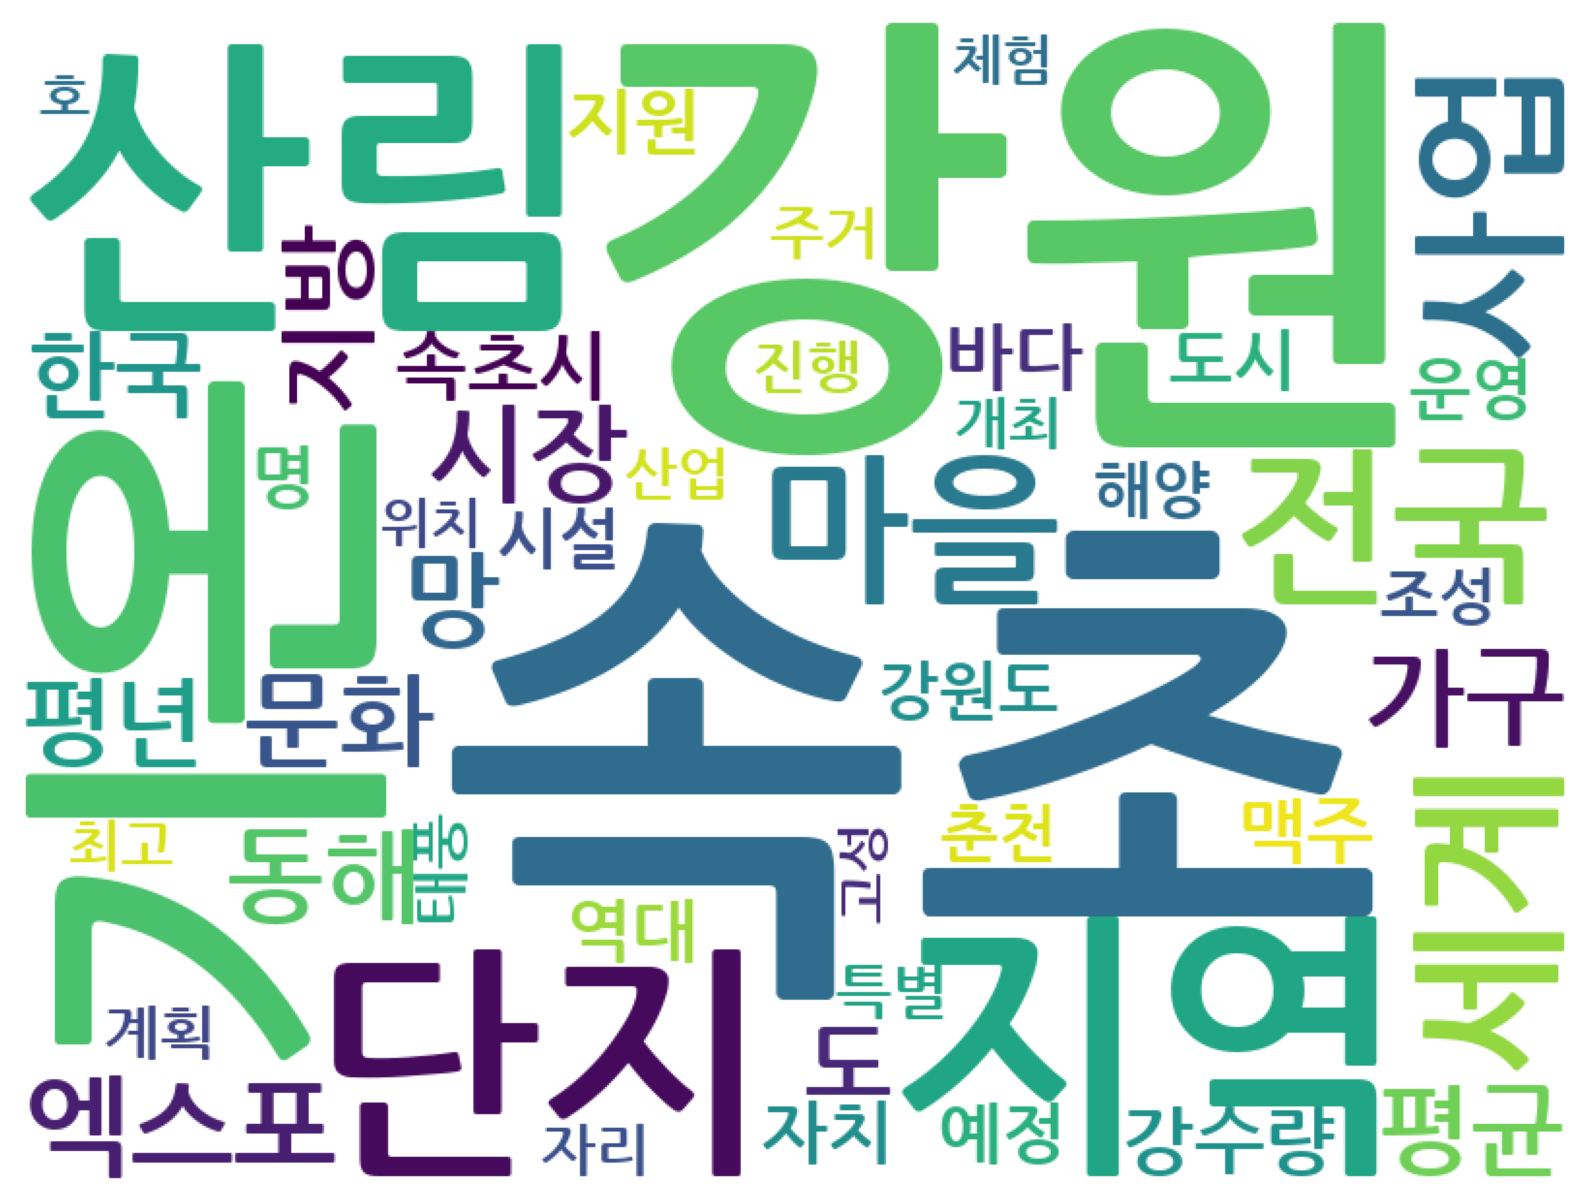

In [198]:
from wordcloud import WordCloud

tags = n_count.most_common(50)

wc = WordCloud(font_path=path, background_color='white', width=800, height=600)
cloud = wc.generate_from_frequencies(dict(tags))
plt.figure(figsize=(10,8))
plt.axis('off')
plt.imshow(cloud)

이 코드는 한글 워드클라우드를 생성하여 시각화하는 작업을 수행합니다. 아래는 코드의 각 부분에 대한 해설입니다:

1. `import matplotlib.font_manager as fm`: `matplotlib` 라이브러리에서 폰트 매니저를 사용하기 위해 필요한 모듈을 import 합니다.

2. `import numpy as np`: NumPy 라이브러리를 `np` 별칭으로 import 합니다.

3. `import matplotlib.pyplot as plt`: Matplotlib 라이브러리의 pyplot 모듈을 `plt` 별칭으로 import 합니다.

4. `%matplotlib inline` 및 `%config InlineBackend.figure_format = 'retina'`: Jupyter Notebook 환경에서 그래프를 인라인으로 표시하도록 설정합니다. 'retina'은 고해상도 디스플레이를 지원합니다.

5. `path = '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf'`: 사용할 한글 폰트 파일의 경로를 지정합니다. 이 경우 나눔고딕 볼드체를 사용합니다.

6. `fontprop = fm.FontProperties(fname=path, size=18)`: 한글 폰트 속성을 설정합니다. 나눔고딕 볼드체를 사용하며, 크기는 18로 지정합니다.

7. `from wordcloud import WordCloud`: `wordcloud` 라이브러리에서 WordCloud 클래스를 import 합니다.

8. `tags = n_count.most_common(50)`: 앞서 생성한 `n_count` 딕셔너리에서 가장 빈도가 높은 50개의 단어와 그 빈도를 추출하여 `tags`에 저장합니다.

9. `wc = WordCloud(font_path=path, background_color='white', width=800, height=600)`: WordCloud 객체를 생성합니다. 이때 폰트 경로, 배경색, 그림의 크기 등을 설정합니다.

10. `cloud = wc.generate_from_frequencies(dict(tags))`: `tags`에서 단어와 빈도를 가져와 WordCloud를 생성합니다.

11. `plt.figure(figsize=(10,8))`: 그림의 크기를 설정합니다.

12. `plt.axis('off')`: 축을 보이지 않도록 설정합니다.

13. `plt.imshow(cloud)`: WordCloud 객체를 이미지로 출력합니다.

이 코드를 실행하면 주어진 데이터에서 가장 빈도가 높은 50개의 단어를 가지고 워드클라우드가 생성되어 시각화됩니다.